IMT 2200 - Introducción a Ciencia de Datos<br>
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

---

## Tarea 01 – Cargando y Analizando Datos

- **Fecha de Entrega:** martes 26 de agosto de 2025, a las 23:59.
- 
**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en l emódulo de Tara 01 habilitado en Canvas.




## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tara.

- Deben hacer sus consultas y comentarios sobre la Tarea a traves del canal de Tareas en eo del curso en Canvas.os.
cteriza.

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

Para esta tarea, tendremos como objetivo comprender cómo han cambiado los juegos de mesa en los últimos 40 años. Específicamente queremos saber qué tipos de juegos se han vuelto más comunes hoy en día y qué los caracteriza.

### 1.3 Recomendaciones
- Utiliza las librerías sugeridas en el notebook o justifica brevemente si incorporas otras.
- Revisa que todas las celdas se ejecuten en orden, desde el inicio, sin errores.
- Comenta tu código para explicar qué hace cada sección relevante.
- Asegúrate de que las visualizaciones sean fáciles de interpretar y tengan títulos y etiquetas adecuados.

## 2. Datos

Estaremos utilizando información extraída desde [BoardGameGeek.com](https://boardgamegeek.com/), una plataforma para aficionados de los juegos de mesa, que permite a sus usuarios registrar, calificar e intercambiar sus juegos favoritos. Actualmente, BGG es una de las bases de datos más extensa y diversa de juegos de mesa.

El dataset con el que trabajaremos consiste en un grupo de archivos CSV que contienen información sobre más de 100.000 juegos de mesa almacenados en la plataforma. Este puede descargarse directamente desde el siguiente enlace: https://www.kaggle.com/datasets/mshepherd/board-games Para descargar los datos, haga click en el botón de **Download**, donde podrá descargar los archivos como `.zip`, o bien utilizar la API de Kaggle.

Para el desarrollo de esta tarea, solo utilizaremos los archivos con el prefijo `bgg_`.

**Si utiliza la API de Kaggle para descargar los datos, deje el código utilizado en la siguiente celda:**

In [12]:
# Descarga de datos desde Kaggle

### 2.1 Librerías

Para esta tarea recomendamos al menos usar las librerías indicadas en la siguiente celda del Notebook. Puede agregar otras si lo estima conveniente para responder de mejor forma las preguntas de la Tarea.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 3. Desarrollo

Para cada una de las siguientes preguntas o actividades incluya una o más celdas de código y Markdown con las respuestas o comentarios necesarios para contestar la pregunta o lograr la actividad. Agregue sus celdas a continuación de cada pregunta para que el Notebook quede ordenado.

En el caso de gráficos, figuras o tablas, asegúrese que todas tengan título, etiquetas en los ejes o haya claridad de los contenidos.

### 3.1 DataFrame unificado (1 punto)

Vamos a cargar en un DataFrame los datos de juegos guardados en el documento `bgg_GameItem.csv`. Al inspeccionar nuestros datos, podemos notar que los valores de ciertas comunas vienen "codificados" con ID. Para comenzar, vamos a juntar la información de los distintos archivos descargados.

**a) (0.8 pts)** Genere un DataFrame único con toda la información de cada juego, incluyendo: nombres de artistas y diseñadores involucrados, mecánicas, categorías, tipo, familia y editorial. Guarde este DataFrame en un nuevo archivo CSV.

In [2]:
# Leo los datos en dataframes
df_games = pd.read_csv("data/bgg_GameItem.csv")
df_game_category = pd.read_csv("data/bgg_Category.csv")
df_game_family = pd.read_csv("data/bgg_GameFamily.csv")
df_game_mechanic = pd.read_csv("data/bgg_Mechanic.csv")
df_game_type = pd.read_csv("data/bgg_GameType.csv")
df_person = pd.read_csv("data/bgg_Person.csv")
df_publisher = pd.read_csv("data/bgg_Publisher.csv")

# Convierto los datos en diccionarios para mapear
# Genero diccionario para mapear la categoria
category_dict = dict(zip(df_game_category["bgg_id"].astype(str), df_game_category["name"].astype(str)))
# Genero diccionario para mapear la familia
family_dict = dict(zip(df_game_family["bgg_id"].astype(str), df_game_family["name"].astype(str)))
# Genero diccionario para mapear la mecanica
mechanic_dict = dict(zip(df_game_mechanic["bgg_id"].astype(str), df_game_mechanic["name"].astype(str)))
# Genero un diccionario para mapear las personas
person_dict = dict(zip(df_person["bgg_id"].astype(str), df_person["name"].astype(str)))
# Genero un diccionario para mapear los publishers
publisher_dict = dict(zip(df_publisher["bgg_id"].astype(str), df_publisher["name"].astype(str)))
# Genero un diccionario para mapear los tipos de juego
game_type_dict = dict(zip(df_game_type["bgg_id"].astype(str), df_game_type["name"].astype(str)))

# Creao una funcion global para mapear si la celda tiene mas de un id
# La funcion recibe la celda y el diccionario a usar, y devuelve la celda mapeada, con el valor del id
def map_game_cell(cell, dictionary):
    if pd.isna(cell):
        return cell
    ids = str(cell).split(",")
    ids = [i.strip() for i in ids]
    mapped_keys = [dictionary.get(i, i) for i in ids]
    return ", ".join(mapped_keys)

# Reemplazar en la columna respectiva el id por el valor del diccionario
df_games["game_type"] = df_games["game_type"].apply(map_game_cell, args=(game_type_dict,))
df_games["designer"] = df_games["designer"].apply(map_game_cell, args=(person_dict,))
df_games["artist"] = df_games["artist"].apply(map_game_cell, args=(person_dict,))
df_games["publisher"] = df_games["publisher"].apply(map_game_cell, args=(publisher_dict,))
df_games["category"] = df_games["category"].apply(map_game_cell, args=(category_dict,))
df_games["mechanic"] = df_games["mechanic"].apply(map_game_cell, args=(mechanic_dict,))
df_games["family"] = df_games["family"].apply(map_game_cell, args=(family_dict,))
#df_games.head()

# Guarda el dataframe en un nuevo csv
df_games.to_csv("data/bgg_games_mapped.csv", index=False)



**b) (0.2 pts)** ¿Cuánto espacio en disco ocupa este DataFrame? ¿Cuánto espacio en disco ocupan los documentos CSV separados? ¿A qué se debe esta diferencia? Comente.



Tamaño del archivo creado  = 29.5 MB
Tamaño de los archivos = 17.1 MB

La diferencia se debe a la desnormalización de la información, aumentaron la cantidad de caracteres al pasar de un id a nombres mas largos.

### 3.2 Juegos publicados anualmente (1.5 puntos)


**a) (0.5 pts)** Limpie los datos para dejar solo aquellos que tienen valores válidos de año de publicación. Luego responda: ¿cuál es el rango de años con el que estamos trabajando? ¿Tienen sentido estos años?


In [3]:
# Crea un nuevo dataframe con los id mappeados
df_mapped = pd.read_csv("data/bgg_games_mapped.csv")
# Crea un nuevo dataframe con las filas que tienen un valor válido en la columna "year"
df_valid_year = df_mapped[df_mapped["year"].notna()].copy()
#df_valid_year.head()

# Convierte los valores de la columna "year" a enteros
df_valid_year["year"] = df_valid_year["year"].astype(int)

# Obtniene el valor mnimo y mximo de la columna "year"
year_min = df_valid_year["year"].min()
year_max = df_valid_year["year"].max()

# Print de los resultados y del rango de años
print("Año mínimo:", year_min)
print("Año máximo:", year_max)
range_years = year_max - year_min
print("Rango de años:", range_years)


Año mínimo: -3500
Año máximo: 2026
Rango de años: 5526


Al validar y filtrar los datos de la columna año ("year), se obtiene un valor minimo de -3500 y máximo de 2026 dando un rango de 5.526 años, es decir, hay datos en la columna "year" con valores negativos, lo que carece de sentido al tratarse de datos relacionados a juegos de mesa.

**b) (0.5 pts)** Seleccione solamente los juegos entre los años 1980 y 2025. Luego grafique la cantidad de juegos publicados por año. ¿Cómo es esta tendencia? Comente.

Año mínimo limpio: 1980
Año máximo limpio: 2025
Rango de años limpio: 45


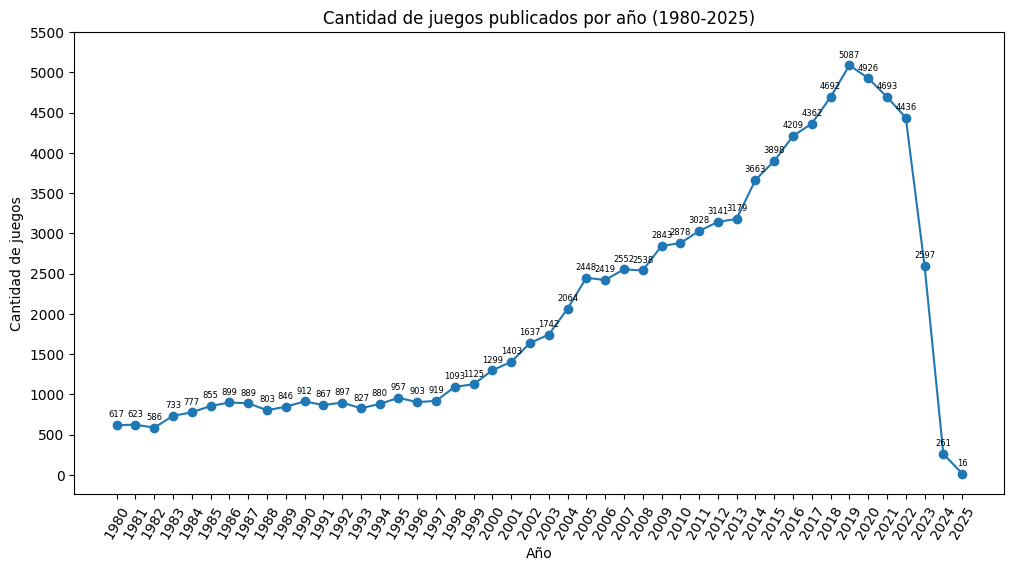

In [19]:
# Crea un dataframe con los años entre 1980 y 2025, busca un nuevo minimo y maximo
# Se calcula un nuevo rango de años
df_clean_year = df_valid_year[(df_valid_year["year"] >= 1980) & (df_valid_year["year"] <= 2025)]
year_min_clean = df_clean_year["year"].min()
year_max_clean = df_clean_year["year"].max()    
range_years_clean = year_max_clean - year_min_clean
print("Año mínimo limpio:", year_min_clean) 
print("Año máximo limpio:", year_max_clean)
print("Rango de años limpio:", range_years_clean)

# Cuenta la cantidad de juegos por año, los ordena por año y los grafica
games_per_year = df_clean_year["year"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o')
plt.title("Cantidad de juegos publicados por año (1980-2025)")
plt.xlabel("Año")
plt.ylabel("Cantidad de juegos")
plt.xticks(range(1980, 2026, 1), rotation=60)
plt.yticks(range(0, max(games_per_year.values) + 500, 500))
#plt.grid(True)
for x, y in zip(games_per_year.index, games_per_year.values):
    plt.text(x, y + 100, str(y), ha="center", fontsize=6)
plt.show()
# Añade etiquetas a cada punto del gráfico


Entre los años 1980 y 1997 se publicaron entre 500 a 1000 juegos por año, a partir del año 1998 hasta 2019 se observa un aumento progresivo en la publicación de juegos de mesa  con un pequeño estancamiento entre 2004 y 2008. Desde el año 20202 se observa una baja en la publicación de juegos, esto podría deberse a una disminución en los registros o problemas socio-económicos asociados a la pandemia de COVID-19.

**c) (0.5 pts)** ¿Entre qué años hubo un mayor aumento de publicación de juegos de mesa según los registros de BGG?

A partir del gráfico se puede observar una pendiente mas pronunciada entre los años 2013 y 2014, esto se comprueba tambien aplicando la función .diff() 

In [20]:
# Calcula la diferencia anual en la cantidad de juegos publicados y muestra los 5 años con mayor aumento
games_diff = games_per_year.diff()
top_increase_year = games_diff.sort_values(ascending=False).head(5)
print("Años con mayor aumento en la publicación de juegos:")
print(top_increase_year)

Años con mayor aumento en la publicación de juegos:
year
2014    484.0
2019    395.0
2005    384.0
2018    330.0
2004    322.0
Name: count, dtype: float64


### 3.3 Análisis de duración y complejidad (1.5 puntos)

Si bien hay muchas posibles características que podemos explorar para los juegos de mesa, esta vez nos centraremos en el tiempo de juego y la complejidad. En esta sección queremos comprender si se ha modificado notablemente la duración promedio y la percepción de complejidad de los juegos de mesa a través de los años.

**a) (0.3 pts)** Inspecciones y filtre los datos que tengan valores válidos para: tiempo mínimo de juego, tiempo máximo de juego y complejidad. En el caso de que existan "outliers", puede descartarlos, cosiderando un rango razonable para las variables anteriores. Justifique su desición.

In [ ]:
#df_mapped["max_time"].describe()
#obtengo el mayor valor de max time
#max_time_max = df_mapped["max_time"].max()
#print("Valor máximo de max_time:", max_time_max)

#df_mapped["complexity"].describe()

# Crea un nuevo dataframe con las filas que tienen valores válidos en las columnas "min_time", "max_time" y "complexity"
# Luego filtra los valores para que min_time sea mayor a 0, max_time menor o igual a 1000 y complexity entre 1 y 5, valores válidos para evitar outliers
# Hace un display par observar todas las columnas
df_duration_complexity = df_mapped.dropna(subset=["min_time", "max_time", "complexity"]).copy()
df_duration_complexity = df_duration_complexity[(df_duration_complexity["min_time"] > 0) & (df_duration_complexity["max_time"] <= 1000) & (df_duration_complexity["complexity"].between(1, 5))]
pd.set_option('display.max_columns', None)
df_duration_complexity.head(5)


,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,Strategy Game,Karl-Heinz Schmiel,"Marcus Gschwendtner, Harald Lieske","Hans im Glück, Moskito Spiele, Ediciones MasQu...",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.027778,240.0,240.0,"Economic, Negotiation, Political","Alliances, Area Majority / Influence, Auction/...",NaN,NaN,NaN,"Country: Germany, Political: Elections, Series...",NaN,NaN,369.0,5632.0,7.60139,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,Strategy Game,"G. W. ""Jerry"" D'Arcey",Bob Pepper,"E.S. Lowe, Milton Bradley",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"Card Game, Fantasy",Trick-taking,NaN,NaN,NaN,"Components: Gems/Crystals, Creatures: Dragons,...",2174,NaN,4490.0,584.0,6.65823,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,Strategy Game,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück, 999 Games...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.733333,30.0,60.0,"Abstract Strategy, Medieval","Area Majority / Influence, Hand Management, He...",NaN,NaN,NaN,Components: Map (Continental / National scale)...,NaN,NaN,252.0,15863.0,7.45913,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,Strategy Game,Christian Beierer,Thomas di Paolo,KOSMOS,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,Ancient,"Action Points, Area Majority / Influence, Auct...",NaN,NaN,NaN,"Containers: Triangular Boxes, Country: Egypt, ...",NaN,NaN,5990.0,351.0,6.62296,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,Strategy Game,Sid Sackson,"Scott Okumura, Peter Whitley","3M, The Avalon Hill Game Co, Avalon Hill, Duja...",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.728571,90.0,90.0,"Economic, Territory Building","Hand Management, Investment, Market, Square Gr...",NaN,NaN,NaN,"Components: 9 x 12 Grids, Series: 3M Bookshelf...",NaN,NaN,319.0,19494.0,7.33439,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN


Se aplicó la función .dropna() para las columnas min_time, max_time y complexity para remover las filas sin datos, luego, se filtró por aquellos datos que tuvieran valores postivos en la columna min_time (ya que el tiempo no puede ser negativo), se estableció como un máximo 1000 minutos (considerando juegos que tengan una máxima de 16 horas aproximadamente, es decir, un día sin contar las horas de sueño) y un rango entre 1 y 5 en la columna complexity, que es el rango establecidos como mínimo y máximo por la plataforma.

**b) (0.2 pts)** Veremos ahora si ha cambiado la duración promedio de los juegos de mesa en nuestro rango de años seleccionado. Primero, cree una nueva columna `avg_time` en el dataset con la duración promedio supuesta para cada juego.

In [22]:
# Crea una nueva columna llamada avg_time en el dataset, con la duración promedio entre min_time y max_time
avg_time = (df_duration_complexity["min_time"] + df_duration_complexity["max_time"]) / 2
df_duration_complexity["avg_time"] = avg_time
df_duration_complexity.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id,avg_time
0,1,Die Macher,1986.0,Strategy Game,Karl-Heinz Schmiel,"Marcus Gschwendtner, Harald Lieske","Hans im Glück, Moskito Spiele, Ediciones MasQu...",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.027778,240.0,240.0,"Economic, Negotiation, Political","Alliances, Area Majority / Influence, Auction/...",NaN,NaN,NaN,"Country: Germany, Political: Elections, Series...",NaN,NaN,369.0,5632.0,7.60139,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN,240.0
1,2,Dragonmaster,1981.0,Strategy Game,"G. W. ""Jerry"" D'Arcey",Bob Pepper,"E.S. Lowe, Milton Bradley",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"Card Game, Fantasy",Trick-taking,NaN,NaN,NaN,"Components: Gems/Crystals, Creatures: Dragons,...",2174,NaN,4490.0,584.0,6.65823,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
2,3,Samurai,1998.0,Strategy Game,Reiner Knizia,Franz Vohwinkel,"Fantasy Flight Games, Hans im Glück, 999 Games...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.733333,30.0,60.0,"Abstract Strategy, Medieval","Area Majority / Influence, Hand Management, He...",NaN,NaN,NaN,Components: Map (Continental / National scale)...,NaN,NaN,252.0,15863.0,7.45913,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN,45.0
3,4,Tal der Könige,1992.0,Strategy Game,Christian Beierer,Thomas di Paolo,KOSMOS,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,Ancient,"Action Points, Area Majority / Influence, Auct...",NaN,NaN,NaN,"Containers: Triangular Boxes, Country: Egypt, ...",NaN,NaN,5990.0,351.0,6.62296,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
4,5,Acquire,1964.0,Strategy Game,Sid Sackson,"Scott Okumura, Peter Whitley","3M, The Avalon Hill Game Co, Avalon Hill, Duja...",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.728571,90.0,90.0,"Economic, Territory Building","Hand Management, Investment, Market, Square Gr...",NaN,NaN,NaN,"Components: 9 x 12 Grids, Series: 3M Bookshelf...",NaN,NaN,319.0,19494.0,7.33439,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN,90.0


**c) (0.5 pts)** Grafique la duración promedio de juegos al año entre 1980 y 2025. ¿Existe alguna tendencia? Asegúrese de colocar las unidades correspondientes en sus ejes si es necesario. Comente sus resultados.

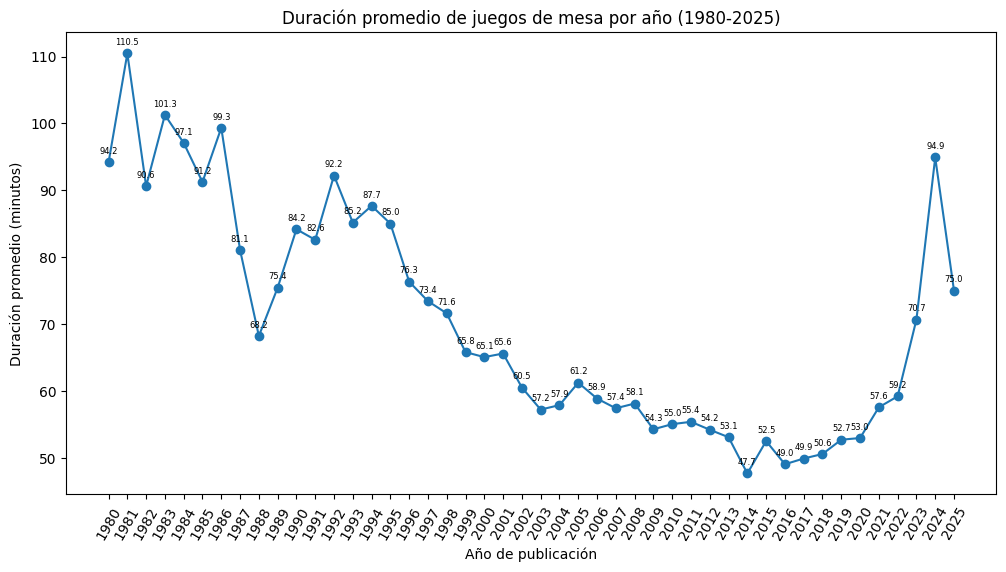

In [26]:
# Filtra el dataframe para los años entre 1980 y 2025, agrupa por año y calcula la duración promedio
# Grafica la duración promedio por año, con etiquetas en cada punto del gráfico
df_avg_time = df_duration_complexity[(df_duration_complexity["year"] >= 1980) & (df_duration_complexity["year"] <= 2025)]
avg_time_per_year = df_avg_time.groupby("year")["avg_time"].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_time_per_year.index, avg_time_per_year.values, marker='o', linestyle='-')
plt.title("Duración promedio de juegos de mesa por año (1980-2025)")
plt.xlabel("Año de publicación")
plt.ylabel("Duración promedio (minutos)")
plt.xticks(range(1980, 2026, 1), rotation=60)
for i, value in enumerate(avg_time_per_year.values):
    plt.text(avg_time_per_year.index[i], value + 1, f"{value:.1f}", ha='center', va='bottom', fontsize=6)   


En general, los juegos tienden a tener una duración entre los 60 - 90 minutos.

**d) (0.5 pts)** Nos interesa saber si los juegos de mesa recientes son más complejos que aquellos publicados antes de los 2000. BoardGameGeek permite evaluar la complejidad (o "weight") de un juego en una escala de 1 a 5, siendo 1 un juego "liviano" o fácil de entender, y 5 un juego "pesado" o complejo. Primero, seleccione los juegos que han sido evaluados por al menos 100 usuarios. Luego grafique la complejidad promedio de los juegos según año. Responda: ¿ha cambiado la percepción de complejidad entre juegos entre 1980 y la actualidad?

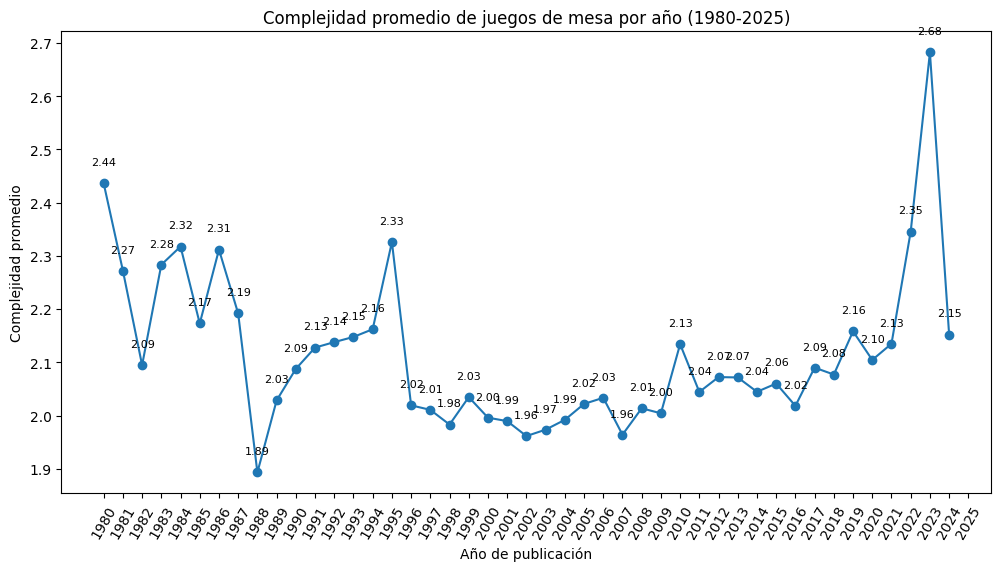

In [30]:
# Se consider la columna num_votes como la columna con la cantidad de usuarios que evaluaron el juego
# Filtra el dataframe para los años entre 1980 y 2025, con al menos 100 votos, agrupa por año y calcula la complejidad promedio
# Grafica la complejidad promedio por año, con etiquetas en cada punto del gráfico
df_complexity = df_duration_complexity[(df_duration_complexity["num_votes"] >= 100) & (df_duration_complexity["year"] >= 1980) & (df_duration_complexity["year"] <= 2025)]
avg_complexity_per_year = df_complexity.groupby("year")["complexity"].mean()
plt.figure(figsize=(12, 6))
plt.plot(avg_complexity_per_year.index, avg_complexity_per_year.values, marker='o', linestyle='-')
plt.title("Complejidad promedio de juegos de mesa por año (1980-2025)")
plt.xlabel("Año de publicación")
plt.ylabel("Complejidad promedio")
plt.xticks(range(1980, 2026, 1), rotation=60)
for i, value in enumerate(avg_complexity_per_year.values):
    plt.text(avg_complexity_per_year.index[i], value + 0.03, f"{value:.2f}", ha='center', va='bottom', fontsize=8)





Según las evaluaciones, hay una disminución en la evaluación de complejidad de los juegos de mesa publicados despues del año 2000 entorno a una complejidad de 2 puntos aproximadamente, a diferencia de las decadas 80 y 90 donde las evaluaciones promedio rondan en torno a los 2.1, 2.2 puntos.

### 3.4 Análisis de categorías comunes (2 puntos)

Existe una gran diversidad de categorías de juegos de mesa. Ahora nos concentraremos en un grupo específico de ellas, con el fin de analizar cómo a cambiado la cantidad de juegos de estas clases desde 1980 hasta hoy.

**a) (0.7 pts)** ¿Cuáles son las 5 categorías más comunes en los juegos del dataset? Muestre la cantidad de juegos que hay de cada una. Puede graficar estos valores, o bien, entregar un DataFrame con sus valores.

In [31]:
# Copia en un nuevo dataframe las filas que tienen un valor válido en la columna "category"
# Luego separa las categorías que están en la misma celda y cuenta la cantidad de veces que aparece cada categoría
# Muestra las 5 categorías más comunes
df_catergories = df_mapped.dropna(subset=["category"]).copy()
df_catergories = df_catergories.assign(category=df_catergories["category"].str.split(", ")).explode("category")
df_top_5_categories = df_catergories["category"].value_counts().head(5).reset_index()
df_top_5_categories.columns = ["category", "count"]
df_top_5_categories


,category,count
0,Card Game,29070
1,Children's Game,15488
2,Wargame,14577
3,Party Game,10722
4,Dice,10308


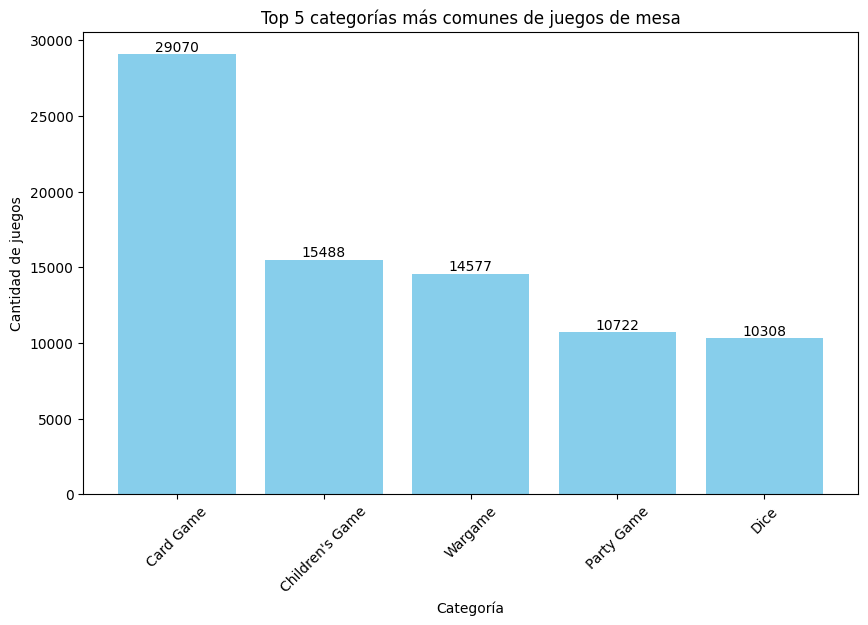

In [ ]:
# Grafica las 5 categorías más comunes
plt.figure(figsize=(10, 6))
plt.bar(df_top_5_categories["category"], df_top_5_categories["count"], color='skyblue')
plt.title("Top 5 categorías más comunes de juegos de mesa")
plt.xlabel("Categoría")
plt.ylabel("Cantidad de juegos")
plt.xticks(rotation=45)
for i, value in enumerate(df_top_5_categories["count"]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

**b) (0.3 pts)** Para cada una de estas 5 categorías, cree un DataFrame que contenga la cantidad de juegos en el dataset según año. Luego junte estos DataFrames en uno solo con los atributos de "Año", "Categoría" y "Cantidad".

In [ ]:
# Crea una copia del dataframe con las filas que tienen un valor válido en la columna "category"
categories = df_mapped.dropna(subset=["category"]).copy()
# Convierte las cadenas de categorías en listas y luego "explota" esas listas en filas separadas
df_exploded = categories.assign(category=categories["category"].str.split(", ")).explode("category")
# Calcula las 5 categorías más comunes
top5_categories = df_exploded["category"].value_counts().head(5).index
# Filtra los primeros 5 categorías más comunes
df_top5 = df_exploded[df_exploded["category"].isin(top5_categories)]
# Filtra en las primeras 5 categorías más comunes, con año no nulo y entre 1980 y 2025
df_top5 = df_exploded[(df_exploded["category"].isin(top5_categories)) & (df_exploded["year"].notna()) & (df_exploded["year"].between(1980, 2025))]
# Agrupa por año y categoría, cuenta la cantidad de juegos en cada grupo, resetea el índice y ordena por año y categoría
df_counts = df_top5.groupby(["year", "category"]).size().reset_index(name="count").sort_values(by=["year", "category"])
df_counts.head(10)



,year,category,count
0,1980.0,Card Game,43
1,1980.0,Children's Game,75
2,1980.0,Dice,46
3,1980.0,Party Game,8
4,1980.0,Wargame,170
5,1981.0,Card Game,52
6,1981.0,Children's Game,76
7,1981.0,Dice,56
8,1981.0,Party Game,11
9,1981.0,Wargame,181


**c) (1 pto)** Grafique, en un solo gráfico y con distintos colores, la cantidad de juegos por año según categoría. Preocúpese de ponerle etiquetas al gráfico para identificar cada categoría y una leyenda donde se muestre cada una. Comente: ¿ha habido un cambio entre los juegos más comunes en los años 80 y hoy?


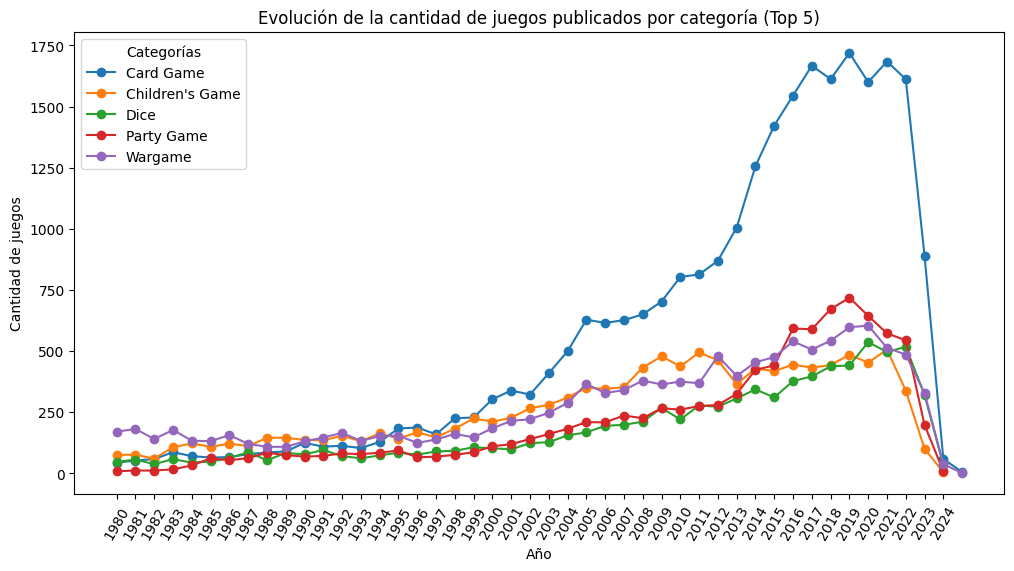

In [ ]:
# Grafica la evolución de la cantidad de juegos publicados por categoría (top 5)
# Cada categoría tiene una línea diferente
plt.figure(figsize=(12, 6))
# Recorre cada categoría y la grafica
for category in df_counts["category"].unique():
    subset = df_counts[df_counts["category"] == category]
    plt.plot(subset["year"], subset["count"], marker='o', linestyle="-", label=category)
plt.title("Evolución de la cantidad de juegos publicados por categoría (Top 5)")
plt.xlabel("Año")   
plt.ylabel("Cantidad de juegos")
plt.legend(title="Categorías")
plt.xticks(range(1980, 2025, 1), rotation=60)
plt.show()

Los juegos mas comunes en la decada de los años 80 pertenecían a la categoría de Wargame (Juegos de guerra), a partir de los años 2000 los juegos pertenecientes a la categoría Card Game (Juego de cartas) se consolidan como la categoría mas común.


### 3.5 Análisis Crítico (Bono +0.5 puntos)

¿Qué limitaciones o problemas encontraste en los datos?

Parte de las limitaciones encontradas en los datos provistos se encuentran datos irreales como años negativos o futuros, hay una cantidad importante de valores faltantes (NaN) y hay datos que se escapan de rangos normales, como en los datos que representan la duración de los juegos, lo que puede distorsionar las variables estadisticas trabajadas (como el promedio). Por último, la aparente falta de datos de los ultimos año hace parecer que ha caído la publicación de juegos.